In [227]:
import urllib.request
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB 
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
from pymystem3 import Mystem
from stop_words import get_stop_words
from transformers import pipeline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [231]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/96/23/18b9c16c18a77755e7f15173821c7100f11e6b3b7717bea8d729bdeb92c0/torch-2.2.2-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 59.7/59.7 MB 7.4 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


In [171]:
iam = 't1.9euelZqUlYyZycmXzpvIk52QxpjMne3rnpWazZPMj8yLi82NjcaXyo6OzJrl8_cRWSlP-e9AISQo_d3z91EHJ0_570AhJCj9zef1656Vmomai82cjZGKjImWiZGOkcye7_zF656Vmomai82cjZGKjImWiZGOkcye.IAZkYYqmib4lBTnOGYY13YcxA3jmPQKw8lfBuTeGyrAJVZf72LaEZxd9E4NAHnOj494veOV4HC23yoh6keH0Bw'
folder = 'b1gv6dqj1vfsrufpk96p'



In [222]:
request = {
  "modelUri": "gpt://b1gv6dqj1vfsrufpk96p/yandexgpt-lite",
  "completionOptions": {
    "stream": False,
    "temperature": 0.3,
    "maxTokens": "2000"
  },
  "messages": [
    {
      "role": "system",
      "text": "–ü–µ—Ä–µ–ø–∏—à–∏ —Ç–µ–∫—Å—Ç —Å –∏—Å–ø–æ–ª—å–∑–æ–∞–Ω–∏–µ–º —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ª–µ–∫—Å–∏–∫–∏, —Å–æ—Ö—Ä–∞–Ω–∏–≤ —Å–º—ã—Å–ª –∏ –¥–ª–∏–Ω–Ω—É —Ç–µ–∫—Å—Ç–∞"
    },
    {
      "role": "user",
      "text": "–ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º –¥–∏–∫–∏–µ –≥–æ–Ω–∫–∏. –ì—Ä—è–∑–Ω–æ : –∫—Ä—É–≥–æ–º —Å—Ç—Ä–æ–π–∫–∏, –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –æ—Ç–∫—Ä—ã—Ç—å –æ–∫–Ω–∞ (16 —ç—Ç–∞–∂! ), –≤–µ—á–Ω–æ –ø–æ —Ä–∞–π–æ–Ω—É –ª–µ—Ç–∞–µ—Ç –º—É—Å–æ—Ä. –î–µ—Ç—Å–∫–∏–µ –ø–ª–æ—â–∞–¥–∫–∏ —É–±–æ–≥–∏–µ, –Ω–∞ –±–æ–ª—å—à–æ–π –ø–ª–æ—â–∞–¥–∏ –æ–¥–Ω–æ—Ç–∏–ø–Ω—ã–µ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏. –û—á–µ–Ω—å –¥–æ—Ä–æ–≥–∞—è –∫–æ–º–º—É–Ω–∞–ª–∫–∞. –ß–∞—Å—Ç–æ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –ø–æ–∂–∞—Ä–Ω–∞—è —Å–∏–≥–Ω–∞–ª–∏–∑–∞—Ü–∏—è. –ñ–∏–ª—å—Ü—ã —É–∂–µ –Ω–µ —Ä–µ–∞–≥–∏—Ä—É—é—Ç. –í —ç—Ç–æ –≤—Ä–µ–º—è, –æ–±—ã—á–Ω–æ –æ–∫–æ–ª–æ —á–∞—Å–∞, –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç –ª–∏—Ñ—Ç—ã. –ò–∑ –ø–ª—é—Å–æ–≤ - –æ—Ç–ª–∏—á–Ω–∞—è –ø–ª–∞–Ω–∏—Ä–æ–≤–∫–∞ –∫–≤–∞—Ä—Ç–∏—Ä ( –ú–æ—Å–∫–æ–≤—Å–∫–∞—è 194 ), –Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥. –†–µ–º–æ–Ω—Ç –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–∞ –Ω–∞ 3-. –û–∫–Ω–∞ –≤–æ–æ–±—â–µ –∂—É—Ç—å - –≤–º–µ—Å—Ç–æ –≤–µ–Ω—Ç–∏–ª—è—Ü–∏–∏. –ü–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—é —Ü–µ–Ω–∞/–∫–∞—á–µ—Å—Ç–≤–æ - 3."
    }
  ]
};

h = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + iam,
    'x-folder-id': folder
}


In [223]:
r = requests.post('https://llm.api.cloud.yandex.net/foundationModels/v1/completion', json=request, headers=h)

In [224]:
r.status_code

200

In [225]:
r.json()

{'result': {'alternatives': [{'message': {'role': 'assistant',
     'text': '–ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n\n–®—É–º–Ω–æ: –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º –Ω–µ–ª–µ–≥–∞–ª—å–Ω—ã–µ —É–ª–∏—á–Ω—ã–µ –≥–æ–Ω–∫–∏. –ù–µ–±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–µ–Ω–Ω–æ: –ø–æ–≤—Å—é–¥—É —Å—Ç—Ä–æ–π–∫–∏, –æ–∫–Ω–∞ (–≤–æ—Ç –æ–Ω, 16 —ç—Ç–∞–∂!) –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –æ—Ç–∫—Ä—ã—Ç—å, —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã–π –º—É—Å–æ—Ä –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –ª–µ—Ç–∞–µ—Ç –ø–æ —Ä–∞–π–æ–Ω—É. –î–µ—Ç—Å–∫–∏–µ –ø–ª–æ—â–∞–¥–∫–∏ –Ω–µ—É—Ö–æ–∂–µ–Ω–Ω—ã–µ, –Ω–∞ –±–æ–ª—å—à–æ–π —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø–ª–æ—â–∞–¥–∫–∏. –û—á–µ–Ω—å –≤—ã—Å–æ–∫–∏–µ –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã–µ –ø–ª–∞—Ç–µ–∂–∏. –ü–æ–∂–∞—Ä–Ω–∞—è —Å–∏–≥–Ω–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç —Ä–µ–≥—É–ª—è—Ä–Ω–æ, –Ω–æ –∂–∏–ª—å—Ü—ã —É–∂–µ –Ω–µ —Ä–µ–∞–≥–∏—Ä—É—é—Ç. –ö–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –≤ —ç—Ç–æ –≤—Ä–µ–º—è, –æ–∫–æ–ª–æ —á–∞—Å–∞, –ø–µ—Ä–µ—Å—Ç–∞—é—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –ª–∏—Ñ—Ç—ã.\n\n–ò–∑ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤ ‚Äî –æ—Ç–ª–∏—á–Ω–∞—è –ø–ª–∞–Ω–∏—Ä–æ–≤–∫–∞ –∫–≤–∞—Ä—Ç–∏—Ä (–ø–æ-–º–æ–µ–º—É, —Å—Ç–∞–ª

In [6]:
import os
from os.path import join
filename = join(os.environ["HOME"], "Datasets/yandex_maps_reviews.csv")

In [7]:
df = pd.read_csv(filename, sep=',')

In [8]:
df.head()

Unnamed: 0                                             addres  \
0           0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...   
1           1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   
2           2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...   
3           3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1   
4           4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39   

                 name  rating  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª     3.0   
1   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ     5.0   
2             LimeFit     1.0   
3        Snow-Express     4.0   
4  –°—Ç—É–¥–∏—è Beauty Brow     5.0   

                                              rubics  \
0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...

In [9]:
df['rubics'] = df['rubics'].apply(lambda x: x.split(';'))

In [10]:
df[df['rubics'].apply(lambda x: '–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤' in x)]

Unnamed: 0                                             addres  \
1                1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   
44              44  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –î–º–∏—Ç—Ä–æ–≤—Å–∫–∏–π –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É...   
45              45  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –î–º–∏—Ç—Ä–æ–≤—Å–∫–∏–π –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É...   
62              62  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ö—Ä–∞—Å–Ω–æ–µ –°–µ–ª–æ, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω–∏–Ω–∞...   
73              73  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –°–æ—á–∏, –∂–∏–ª–æ–π —Ä–∞–π–æ–Ω –ê–¥–ª–µ—Ä, —É...   
...            ...                                                ...   
498847      499816  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω, –ë—É–≥—É–ª—å–º–∞, —É–ª–∏—Ü–∞ –õ–µ–Ω–∏–Ω–∞, ...   
498921      499890   –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –£–≥–ª–∏—á, –†—ã–±–∏–Ω—Å–∫–æ–µ —à–æ—Å—Å–µ, 22–í   
498922      499891  –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫, –ø–æ—Å—ë–ª–æ–∫ –û–≤–æ—â–µ-–ú–æ–ª–æ—á–Ω—ã–π –ö–æ–º–±–∏–Ω–∞...   
498940      499909              –ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫, –¢—Ä–æ–∏—Ü–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 121–∫2   
498993      499962    –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –•–∏–º–∫–∏, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è —É–ª–∏—Ü–∞, 14   

                     name  rating  \
1       –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ     5.0   
44                  –ß–∏–∂–∏–∫     5.0   
45                  –ß–∏–∂–∏–∫     5.0   
62               –¢–µ—Ö–Ω–æ–ª–æ–≥     3.0   
73              –ß–µ—Ä–µ–º—É—à–∫–∏     5.0   
...                   ...     ...   
498847           –í–∏–∫—Ç–æ—Ä–∏—è     5.0   
498921          –ò–∑ –£–≥–ª–∏—á–∞     5.0   
498922    –ú–∞–≥–Ω–∏—Ç –ú–æ—è —Ü–µ–Ω–∞     2.0   
498940          –ê–ª—å–±–∞—Ç—Ä–æ—Å     5.0   
498993           –ú–æ–π –ê—à–∞–Ω     3.0   

                                                   rubics  \
1       [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...   
44                       [–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç, –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
45                       [–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç, –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
62                                    [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
73                       [–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç, –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
...                                                   ...   
498847                                [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
498921                                [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
498922  [–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç, –ú–∞–≥–∞–∑–∏–Ω —Ö–æ–∑—Ç–æ–≤–∞—Ä–æ–≤ –∏ –±—ã—Ç–æ–≤–æ–π —Ö–∏–º...   
498940                                [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤]   
498993  [–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç, –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –≥...   

                                                     text  
1       –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
44      –ö—Ç–æ –ª—é–±–∏—Ç –ø–æ–¥–µ—à–µ–≤–ª–µ, –Ω–∞—Ä–æ–¥—É –Ω–µ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, —Ç–æ...  
45      –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π –ß–∏–∂–∏–∫! –í—Å–µ–≥–¥–∞ —Å–≤–µ–∂–∏–µ –ø—Ä–æ–¥—É–∫—Ç—ã, –æ—á–µ–Ω...  
62      –†–∞–±–æ—Ç–∞–ª–∞ —Ä–∞–Ω—å—à–µ –∫–∞—Å—Å–∏—Ä—à–∞, –Ω–µ —Ä—É—Å—Å–∫–∞—è, –º–æ–ª–æ–¥–∞—è....  
73      –í—Å–µ–≥–¥–∞ –±–µ—Ä—É –∑–¥–µ—Å—å –∑–µ–ª–µ–Ω—å, —Ñ—Ä—É–∫—Ç—ã –∏ –æ–≤–æ—â–∏. –ü–æ –∑...  
...                                                   ...  
498847  –û—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏ –º–∞–≥–∞–∑–∏–Ω, –≤—Å–µ–≥–¥–∞ —Å–≤–µ–∂–∞—è –≤—ã–ø–µ—á–∫–∞ –∏ ...  
498921  –ë—ã–ª–∏ –ø–µ—Ä–µ–¥ —Ñ–µ–≤—Ä–∞–ª—å—Å–∫–∏–º–∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∞–º–∏ –≤ 2023 –≥–æ–¥...  
498922  –ê—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–π. –¢–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –Ω–µ —É–±–∏...  
498940  –•–æ—Ä–æ—à–∏–π –º–∞–≥–∞–∑–∏–Ω. –ë–æ–ª—å—à–æ–π –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç –≤–∫—É—Å–Ω–æ–π –∏...  
498993  –û—Ü–µ–Ω–∫—É —Å–Ω–∏–∑–∏–ª –∏–∑-–∑–∞ –ø—Ä–∏–µ–∑–∂–µ–π –ø—Ä–æ–¥–∞–≤—Ü–∞ —Å —è–≤–Ω—ã–º ...  

[21335 rows x 6 columns]

In [193]:
df['text'][1]

'–ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç, —Ü–µ–Ω—ã –ø—Ä–∏–µ–º–ª–µ–º—ã–µ, –∞ –≥–ª–∞–≤–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤—ã—Å–æ—Ç–µ!!! –°–ø–∞—Å–∏–±–æ —Ç–µ–º, –∫—Ç–æ –æ—Ç–∫—Ä—ã–ª —Å–µ—Ç—å —ç—Ç–∏—Ö –º–∞–≥–∞–∑–∏–Ω—á–∏–∫–æ–≤!!!!'

In [11]:
categories_df = df.explode('rubics')

# Count the occurrences of each category
category_counts = categories_df['rubics'].value_counts()

print(category_counts)

rubics
–ö–∞—Ñ–µ                           58375
–†–µ—Å—Ç–æ—Ä–∞–Ω                       56638
–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞                      43091
–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤              21335
–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç                    19744
                               ...  
–û–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ñ–æ–Ω–¥                  1
–ë–µ–ª—å–µ–≤–∞—è –ø–ª–æ—â–∞–¥–∫–∞                  1
–°—Ç—è–∂–∫–∞ –ø–æ–ª–∞                        1
–í–∑—Ä—ã–≤–Ω—ã–µ —Ä–∞–±–æ—Ç—ã                    1
–í–æ–¥–æ–∫–∞–Ω–∞–ª, –≤–æ–¥–Ω–æ–µ —Ö–æ–∑—è–π—Å—Ç–≤–æ        1
Name: count, Length: 1370, dtype: int64


In [12]:
data = df[df['rubics'].apply(lambda x: '–ö–∞—Ñ–µ' in x or '–†–µ—Å—Ç–æ—Ä–∞–Ω' in x)]

In [15]:
data = data.copy()

In [53]:
data['review_length'] = data['text'].apply(len)

# Calculate the average length of the reviews
average_review_length = data[data['rating'] > 4]['review_length'].mean()

In [54]:
average_review_length

235.20940871817004

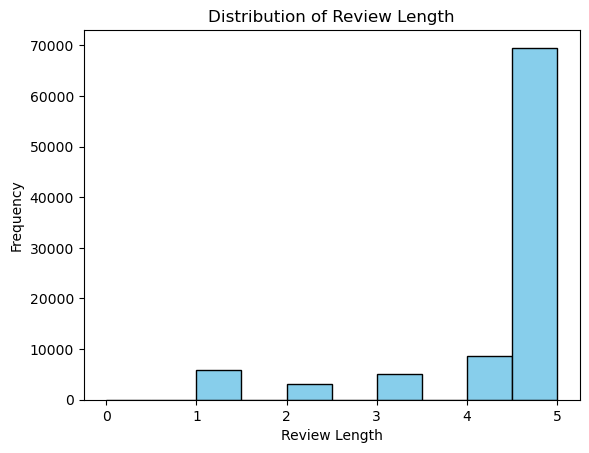

In [21]:
plt.hist(data['rating'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')

# Show plot
plt.show()

In [48]:
len(data[data['rating'] > 4]) / len(data)

0.7539290866297168

In [50]:
quantiles = data[data['rating'] <= 4]['text'].apply(len).quantile([0.1, 0.5, 0.9])

print("25th percentile (Q1):", quantiles[0.1])
print("50th percentile (median):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.9])

25th percentile (Q1): 120.0
50th percentile (median): 323.0
75th percentile (Q3): 855.0


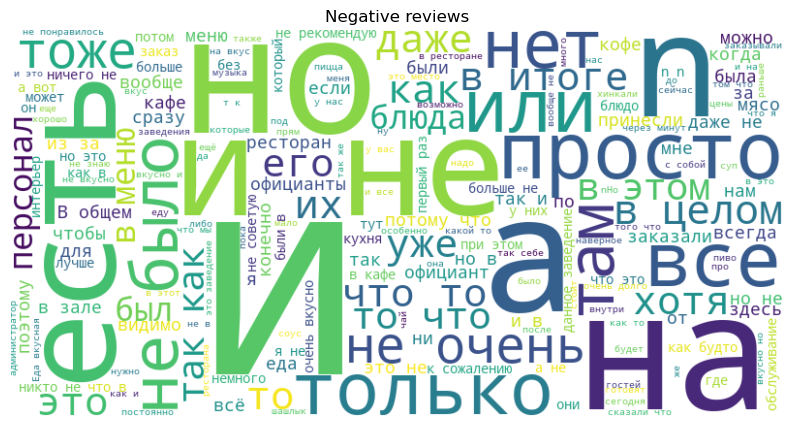

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as pl√çt

# Assuming your DataFrame is named 'df' and the column containing stemmed text is named 'stemmed_text'
text = ' '.join(data[data['rating'] <= 4]['text'])  # Concatenate all text from the column into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Negative reviews')
plt.show()

In [33]:
data

Unnamed: 0                                             addres  \
6                6  –í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ë–æ–≥—É—á–∞—Ä—Å–∫–∏–π —Ä–∞–π–æ–Ω, –ú-4 –î–æ...   
8                8              –ú–æ—Å–∫–≤–∞, 4-–π –ö–æ–∂–µ–≤–Ω–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, 4   
9                9              –ú–æ—Å–∫–≤–∞, 4-–π –ö–æ–∂–µ–≤–Ω–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, 4   
13              13  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥ –°–æ—á–∏, –ø–æ—Å—ë...   
14              14  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥ –°–æ—á–∏, –ø–æ—Å—ë...   
...            ...                                                ...   
499014      499983     –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –ì–µ–Ω–µ—Ä–∞–ª–∞ –û—Å—Ç—Ä—è–∫–æ–≤–∞, 155–í   
499016      499985           –ú–æ—Å–∫–≤–∞, –ë—Ä–∞—Ç–∏—Å–ª–∞–≤—Å–∫–∞—è —É–ª–∏—Ü–∞, 31, –∫–æ—Ä–ø. 1   
499019      499988                    –ú–æ—Å–∫–≤–∞, —É–ª–∏—Ü–∞ –Æ–Ω—ã—Ö –õ–µ–Ω–∏–Ω—Ü–µ–≤, 52   
499020      499989                    –ú–æ—Å–∫–≤–∞, —É–ª–∏—Ü–∞ –Æ–Ω—ã—Ö –õ–µ–Ω–∏–Ω—Ü–µ–≤, 52   
499021      499990                    –ú–æ—Å–∫–≤–∞, —É–ª–∏—Ü–∞ –Æ–Ω—ã—Ö –õ–µ–Ω–∏–Ω—Ü–µ–≤, 52   

                          name  rating                      rubics  \
6                       –£ —Ç–µ—â–∏     4.0                      [–ö–∞—Ñ–µ]   
8                        Jinju     5.0             [–ö–∞—Ñ–µ, –ö–æ—Ñ–µ–π–Ω—è]   
9                        Jinju     4.0             [–ö–∞—Ñ–µ, –ö–æ—Ñ–µ–π–Ω—è]   
13                      –ü–∞–Ω–¥–æ–∫     2.0                  [–†–µ—Å—Ç–æ—Ä–∞–Ω]   
14                      –ü–∞–Ω–¥–æ–∫     5.0                  [–†–µ—Å—Ç–æ—Ä–∞–Ω]   
...                        ...     ...                         ...   
499014                 –ö–æ—á–µ—Ä–≥–∞     5.0       [–ö–∞—Ñ–µ, –ë–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª]   
499016             –®–∞—É—Ä–º–∞ 1001     1.0     [–ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ, –ö–∞—Ñ–µ]   
499019  Petruccio. Pizza&Pasta     5.0  [–†–µ—Å—Ç–æ—Ä–∞–Ω, –ö–∞—Ñ–µ, –ü–∏—Ü—Ü–µ—Ä–∏—è]   
499020  Petruccio. Pizza&Pasta     5.0  [–†–µ—Å—Ç–æ—Ä–∞–Ω, –ö–∞—Ñ–µ, –ü–∏—Ü—Ü–µ—Ä–∏—è]   
499021  Petruccio. Pizza&Pasta     1.0  [–†–µ—Å—Ç–æ—Ä–∞–Ω, –ö–∞—Ñ–µ, –ü–∏—Ü—Ü–µ—Ä–∏—è]   

                                                     text  review_length  
6       –ì–ª—É–±–∏–Ω–∫–∞ —Å—Ç—Ä–∞–Ω—ã –≤–æ –≤—Å–µ—Ö —Å–≤–æ–∏—Ö –ø—Ä–æ—è–≤–ª–µ–Ω–∏—è—Ö. –ê—Å—Å...            490  
8       5 –∏–∑ 5üñ§ –ü–∏–ª –∫–æ—Ñ–µ –∏ –≤ –†–∏–º–µ, –∏ –≤  –ü–∞—Ä–∏–∂–µ, –Ω–æ –≤–∫—É...            270  
9       –ù–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –æ—Ç –º–µ—Ç—Ä–æ –∏–¥—Ç–∏ –º...            214  
13      –°–∞–º—ã–π –±–æ–ª—å—à–æ–π –ø–ª—é—Å —ç—Ç–æ –º–µ—Å—Ç–æ—Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –Ω–∞–±–µ...            485  
14      –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –°–µ–≥–æ–¥–Ω—è –≤–æ –≤—Ç–æ—Ä–æ–π —Ä–∞–∑ –ø–æ—Å–µ—Ç–∏–ª–∏ —Å ...            482  
...                                                   ...            ...  
499014  –í–∫—É—Å–Ω–µ–π—à–∞—è –µ–¥–∞, –æ—Ç–ª–∏—á–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª, —Ä–µ–±—è—Ç–∞ –º–æ–ª–æ...             62  
499016  –ó–∞–ª–µ—Ç–µ–ª–∏ –Ω–æ—á—å—é —Å –¥—Ä—É–∑—å—è–º–∏, —Ä–∞–∑–±—É–¥–∏–ª–∏ —Ä–∞–±–æ—Ç–Ω–∏–∫–∞...            167  
499019  –û—á–µ–Ω—å –≤–∫—É—Å–Ω–∞—è –ø–∏—Ü—Ü–∞. –ù—Ä–∞–≤–∏—Ç—Å—è –∏—Ö —Å–∏—Å—Ç–µ–º–∞ –ª–æ—è–ª—å...            133  
499020  –ü–∏—Ü—Ü–∞ –¥–µ—Ç—è–º –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å, –∏–Ω—Ç–µ—Ä—å–µ—Ä –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ...            149  
499021  –°–µ–≥–æ–¥–Ω—è –∑–∞–∫–∞–∑–∞–ª–∏ —É –≤–∞—Å –¥–æ—Å—Ç–∞–≤–∫—É. –ü–µ—Ä–µ–ø—É—Ç–∞–ª–∏ –Ω–∞...            228  

[92197 rows x 7 columns]

In [131]:
stop_words = get_stop_words('russian')
def remove_russian_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Step 1: Remove punctuation from the text column
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

# Step 2: Remove stop words from the text column
data['text'] = data['text'].apply(remove_russian_stop_words)

In [132]:
mystem = Mystem()

# Function to apply stemming to Russian text
def stem_russian_text(text):
    tokens = mystem.lemmatize(text)
    return ''.join(tokens)

# Apply stemming to the text column
data['text'] = data['text'].apply(stem_russian_text)

In [133]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

In [153]:
data["target"] = data['rating'].apply(lambda x: x > 4)

len(data[data['target'] == False])/len(data)

0.2460709133702832

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, data['target'], test_size=0.3, random_state=42)

In [159]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [160]:
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8738973246565438


In [161]:
print(classification_report(y_test, y_pred, target_names=["Not 5 star", "5 star"]))

              precision    recall  f1-score   support

  Not 5 star       0.95      0.51      0.66      6720
      5 star       0.86      0.99      0.92     20940

    accuracy                           0.87     27660
   macro avg       0.91      0.75      0.79     27660
weighted avg       0.88      0.87      0.86     27660



In [186]:
learn_data = df[df['rubics'].apply(lambda x: '–ö–∞—Ñ–µ' in x or '–†–µ—Å—Ç–æ—Ä–∞–Ω' in x)]
learn_data = learn_data[['rating', 'text']]
learn_data

rating                                               text
6          4.0  –ì–ª—É–±–∏–Ω–∫–∞ —Å—Ç—Ä–∞–Ω—ã –≤–æ –≤—Å–µ—Ö —Å–≤–æ–∏—Ö –ø—Ä–æ—è–≤–ª–µ–Ω–∏—è—Ö. –ê—Å—Å...
8          5.0  5 –∏–∑ 5üñ§ –ü–∏–ª –∫–æ—Ñ–µ –∏ –≤ –†–∏–º–µ, –∏ –≤  –ü–∞—Ä–∏–∂–µ, –Ω–æ –≤–∫—É...
9          4.0  –ù–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –æ—Ç –º–µ—Ç—Ä–æ –∏–¥—Ç–∏ –º...
13         2.0  –°–∞–º—ã–π –±–æ–ª—å—à–æ–π –ø–ª—é—Å —ç—Ç–æ –º–µ—Å—Ç–æ—Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –Ω–∞–±–µ...
14         5.0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –°–µ–≥–æ–¥–Ω—è –≤–æ –≤—Ç–æ—Ä–æ–π —Ä–∞–∑ –ø–æ—Å–µ—Ç–∏–ª–∏ —Å ...
...        ...                                                ...
499014     5.0  –í–∫—É—Å–Ω–µ–π—à–∞—è –µ–¥–∞, –æ—Ç–ª–∏—á–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª, —Ä–µ–±—è—Ç–∞ –º–æ–ª–æ...
499016     1.0  –ó–∞–ª–µ—Ç–µ–ª–∏ –Ω–æ—á—å—é —Å –¥—Ä—É–∑—å—è–º–∏, —Ä–∞–∑–±—É–¥–∏–ª–∏ —Ä–∞–±–æ—Ç–Ω–∏–∫–∞...
499019     5.0  –û—á–µ–Ω—å –≤–∫—É—Å–Ω–∞—è –ø–∏—Ü—Ü–∞. –ù—Ä–∞–≤–∏—Ç—Å—è –∏—Ö —Å–∏—Å—Ç–µ–º–∞ –ª–æ—è–ª—å...
499020     5.0  –ü–∏—Ü—Ü–∞ –¥–µ—Ç—è–º –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å, –∏–Ω—Ç–µ—Ä—å–µ—Ä –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ...
499021     1.0  –°–µ–≥–æ–¥–Ω—è –∑–∞–∫–∞–∑–∞–ª–∏ —É –≤–∞—Å –¥–æ—Å—Ç–∞–≤–∫—É. –ü–µ—Ä–µ–ø—É—Ç–∞–ª–∏ –Ω–∞...

[92197 rows x 2 columns]

In [187]:
data_train, data_test = train_test_split(learn_data, test_size=0.3, random_state=42)

In [188]:
data_train_filename = join(os.environ["HOME"], "Datasets/yandex_data_train.csv")
data_train.to_csv(data_train_filename)

In [189]:
data_test_filename = join(os.environ["HOME"], "Datasets/yandex_data_for_llm.csv")
data_test.to_csv(data_test_filename)

In [232]:
quantiles = data_train['text'].apply(len).quantile([0.1, 0.5, 0.9])

print("25th percentile (Q1):", quantiles[0.1])
print("50th percentile (median):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.9])

25th percentile (Q1): 89.0
50th percentile (median): 206.0
75th percentile (Q3): 557.0


In [233]:
quantiles = data_test['text'].apply(len).quantile([0.1, 0.5, 0.9])

print("25th percentile (Q1):", quantiles[0.1])
print("50th percentile (median):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.9])

25th percentile (Q1): 89.0
50th percentile (median): 205.0
75th percentile (Q3): 547.0


In [237]:
len(data_test[data_test['rating'] > 4])/len(data_test)

0.7570498915401301

In [238]:
len(data_train[data_train['rating'] > 4])/len(data_train)

0.7525915366378977